In [1]:
import pandas as pd

cheese = pd.read_csv("resources/data/cheese_dataset.csv")
cheese_matching = pd.read_csv("resources/data/cheese_matching.csv", encoding="utf-8")

In [2]:
cheese.head(3)

,Unnamed: 0,Unnamed: 0.1,ranking,cheese_id,brand,name,country,matching,texture,types,category,price,content,img,brand_code,country_code
0,0,1,1,1,벨지오이오소,부라타 치즈,이탈리아,"채소, 발사믹식초, 견과류",1,1,11,14900,버터처럼 부드러운 크림이 들어있는 생치즈,https://img-cf.kurly.com/shop/data/goods/15153...,11,1
1,1,2,2,2,프란시아,모짜렐라 카우,이탈리아,"토마토,바질,샐러드",1,1,1,3870,신선하게 피어난 우유 그대로의 맛,https://img-cf.kurly.com/shop/data/goods/15445...,15,1
2,2,3,3,3,브렐렛,모짜렐라 카우,이탈리아,"카프레제, 사퀘테리",1,1,1,3990,이탈리아 브리미에서 제조된 신선한 모짜렐라!,https://img-cf.kurly.com/shop/data/goods/15464...,12,1


In [3]:
cheese_matching.head(3)

,Unnamed: 0,간식,감자,견과류,과일,그라탕,김가루,꿀,딥소스,라자냐,...,테이블치즈,토마토,토스트,파스타,팬케이크,퐁듀,피자,핑거 푸드,핑거푸드,화이트와인
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cheese_df = cheese.rename(columns = {"Unnamed: 0": "cheese_no"})
cheese_matching_df = cheese_matching.rename(columns={"Unnamed: 0": "cheese_no"})

In [5]:
cheese_data = pd.merge(cheese_df, cheese_matching_df, on="cheese_no", how = "inner")

In [6]:
cheese_data.head(3)

,cheese_no,Unnamed: 0.1,ranking,cheese_id,brand,name,country,matching,texture,types,...,테이블치즈,토마토,토스트,파스타,팬케이크,퐁듀,피자,핑거 푸드,핑거푸드,화이트와인
0,0,1,1,1,벨지오이오소,부라타 치즈,이탈리아,"채소, 발사믹식초, 견과류",1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,2,프란시아,모짜렐라 카우,이탈리아,"토마토,바질,샐러드",1,1,...,0,1,0,0,0,0,0,0,0,0
2,2,3,3,3,브렐렛,모짜렐라 카우,이탈리아,"카프레제, 사퀘테리",1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cheese_model_data = cheese_data.drop(['Unnamed: 0.1', 'content', 'img', 'brand', 'name', 'country', 'matching'], axis = 1)
cheese_2 = cheese_data.drop(['Unnamed: 0.1', 'content', 'img', 'matching'], axis = 1)

In [8]:
cheese_model_data.head(3)

,cheese_no,ranking,cheese_id,texture,types,category,price,brand_code,country_code,간식,...,테이블치즈,토마토,토스트,파스타,팬케이크,퐁듀,피자,핑거 푸드,핑거푸드,화이트와인
0,0,1,1,1,1,11,14900,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,1,1,1,3870,15,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,3,3,1,1,1,3990,12,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
cheese_model_data.to_csv("resources/data/cheese_model_data.csv", encoding = 'utf-8-sig')

In [10]:
print(cheese_model_data.columns)

Index(['cheese_no', 'ranking', 'cheese_id', 'texture', 'types', 'category',
       'price', 'brand_code', 'country_code', '간식', '감자', '견과류', '과일', '그라탕',
       '김가루', '꿀', '딥소스', '라자냐', '리소토', '마르게리타 피자', '막걸리', '맥앤치즈', '맥주',
       '멤브리요', '무화과', '바질', '발사믹 식초', '발사믹식초', '배', '베이컨', '볶음밥', '비스킷', '빵',
       '사케', '사퀘테리', '샌드위치', '샐러드', '샐러리', '샤퀴테리', '소금', '스테이크', '스프', '스프레드',
       '올리브오일', '올리브유', '와인', '위스키', '잼', '채소', '치즈케이크', '카나페', '카프레제',
       '카프레제 샐러드', '크래커', '크로스티니', '키쉬', '타르트', '타파스', '테이블치즈', '토마토', '토스트',
       '파스타', '팬케이크', '퐁듀', '피자', '핑거 푸드', '핑거푸드', '화이트와인'],
      dtype='object')


## Train, Test 데이터 셋 분리

In [11]:
from sklearn.model_selection import train_test_split

# X = users.loc[['texture', 'types', 'category', 'brand_code', ]]
X_cheese = cheese_model_data.iloc[:, 3:68]
X_cheese = X_cheese.drop(['category'], axis = 1)
y_cheese = cheese_model_data[['category']]

X_cheese_train, X_cheese_test, y_cheese_train, y_cheese_test = train_test_split(X_cheese, y_cheese, test_size = 0.3)

In [14]:
X_cheese_train

,texture,types,price,brand_code,country_code,간식,감자,견과류,과일,그라탕,...,테이블치즈,토마토,토스트,파스타,팬케이크,퐁듀,피자,핑거 푸드,핑거푸드,화이트와인
46,2,1,9900,20,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
61,2,1,7500,13,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
49,1,1,8900,34,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,3,1,7400,23,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
28,1,1,8400,34,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
58,2,1,7200,10,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,4165,32,7,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45,3,1,8900,23,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
29,1,1,6900,35,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
66,3,1,11500,39,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 표준화

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

X_cheese_sc = StandardScaler().fit_transform(X_cheese)
X_cheese_train_sc = StandardScaler().fit_transform(X_cheese_train)
X_cheese_test_sc = StandardScaler().fit_transform(X_cheese_test)

features = ['texture', 'types',
       'price', 'brand_code', 'country_code', '간식', '감자', '견과류', '과일', '그라탕',
       '김가루', '꿀', '딥소스', '라자냐', '리소토', '마르게리타 피자', '막걸리', '맥앤치즈', '맥주',
       '멤브리요', '무화과', '바질', '발사믹 식초', '발사믹식초', '배', '베이컨', '볶음밥', '비스킷', '빵',
       '사케', '사퀘테리', '샌드위치', '샐러드', '샐러리', '샤퀴테리', '소금', '스테이크', '스프', '스프레드',
       '올리브오일', '올리브유', '와인', '위스키', '잼', '채소', '치즈케이크', '카나페', '카프레제',
       '카프레제 샐러드', '크래커', '크로스티니', '키쉬', '타르트', '타파스', '테이블치즈', '토마토', '토스트',
       '파스타', '팬케이크', '퐁듀', '피자', '핑거 푸드', '핑거푸드', '화이트와인']

# pd.DataFrame(X_cheese_train_sc, columns = features).head()

,texture,types,price,brand_code,country_code,간식,감자,견과류,과일,그라탕,...,테이블치즈,토마토,토스트,파스타,팬케이크,퐁듀,피자,핑거 푸드,핑거푸드,화이트와인
0,-0.163912,0.0,0.501660,-0.238603,0.619527,-0.206284,-0.144338,-0.373544,-0.298142,-0.206284,...,-0.206284,-0.255377,-0.144338,1.256562,0.0,-0.144338,-0.569495,0.0,-0.255377,0.0
1,-0.163912,0.0,-0.276384,-0.823180,-0.055069,-0.206284,-0.144338,-0.373544,-0.298142,-0.206284,...,-0.206284,-0.255377,-0.144338,1.256562,0.0,-0.144338,-0.569495,0.0,-0.255377,0.0
2,-0.967083,0.0,0.177475,0.930552,-0.729665,-0.206284,-0.144338,-0.373544,-0.298142,-0.206284,...,-0.206284,-0.255377,-0.144338,-0.795822,0.0,-0.144338,-0.569495,0.0,-0.255377,0.0
3,0.639258,0.0,-0.308803,0.011930,-0.729665,-0.206284,-0.144338,-0.373544,-0.298142,4.847680,...,-0.206284,-0.255377,-0.144338,1.256562,0.0,-0.144338,1.755942,0.0,-0.255377,0.0
4,-0.967083,0.0,0.015382,0.930552,-0.729665,-0.206284,-0.144338,-0.373544,-0.298142,-0.206284,...,-0.206284,-0.255377,-0.144338,1.256562,0.0,-0.144338,1.755942,0.0,-0.255377,0.0


## 변수들 상관관계 확인

ValueError: The condensed distance matrix must contain only finite values.

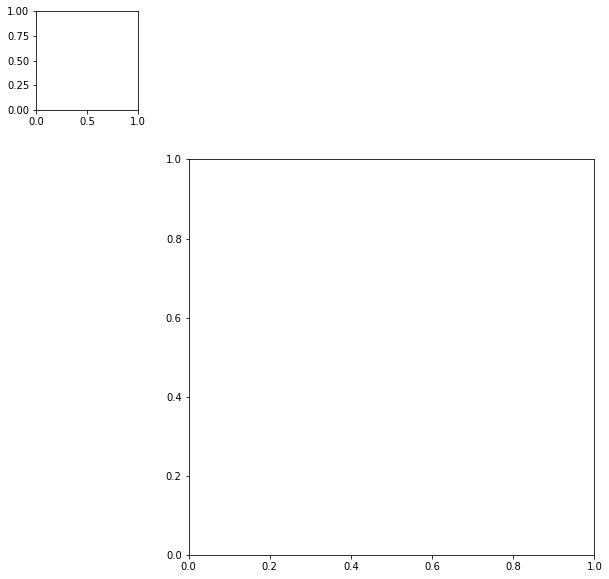

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

def make_corr(data):
    make_corr = data.corr()
    sns.clustermap(make_corr, annot = True, cmap = 'RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
    plt.show()
    
    
make_corr(cheese_model_data)

## 주성분 분석

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/an

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/ana

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54273 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bitai/ana

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/env

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54000 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bitai/anaconda3/env

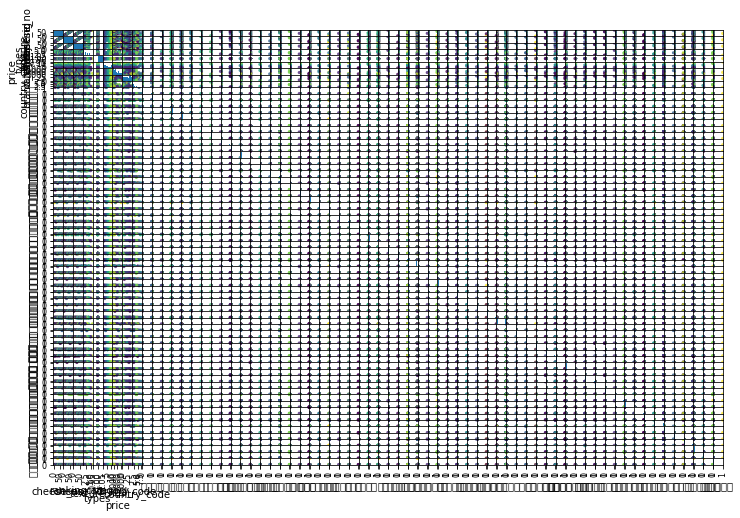

In [17]:
from pandas.plotting import scatter_matrix

#creating data frame for pandas
# dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
scatter_matrix(cheese_model_data, c=cheese_model_data['category'], marker='o', s=10,alpha=.8, figsize=(12,8))
plt.show()

### (1) PCA 모델링 - 0

In [34]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [38]:
pca = PCA(random_state = 1107)
X_pca = pca.fit_transform(X_cheese_sc)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.074232
1     0.137462
2     0.194307
3     0.246486
4     0.292375
        ...   
59    1.000000
60    1.000000
61    1.000000
62    1.000000
63    1.000000
Length: 64, dtype: float64

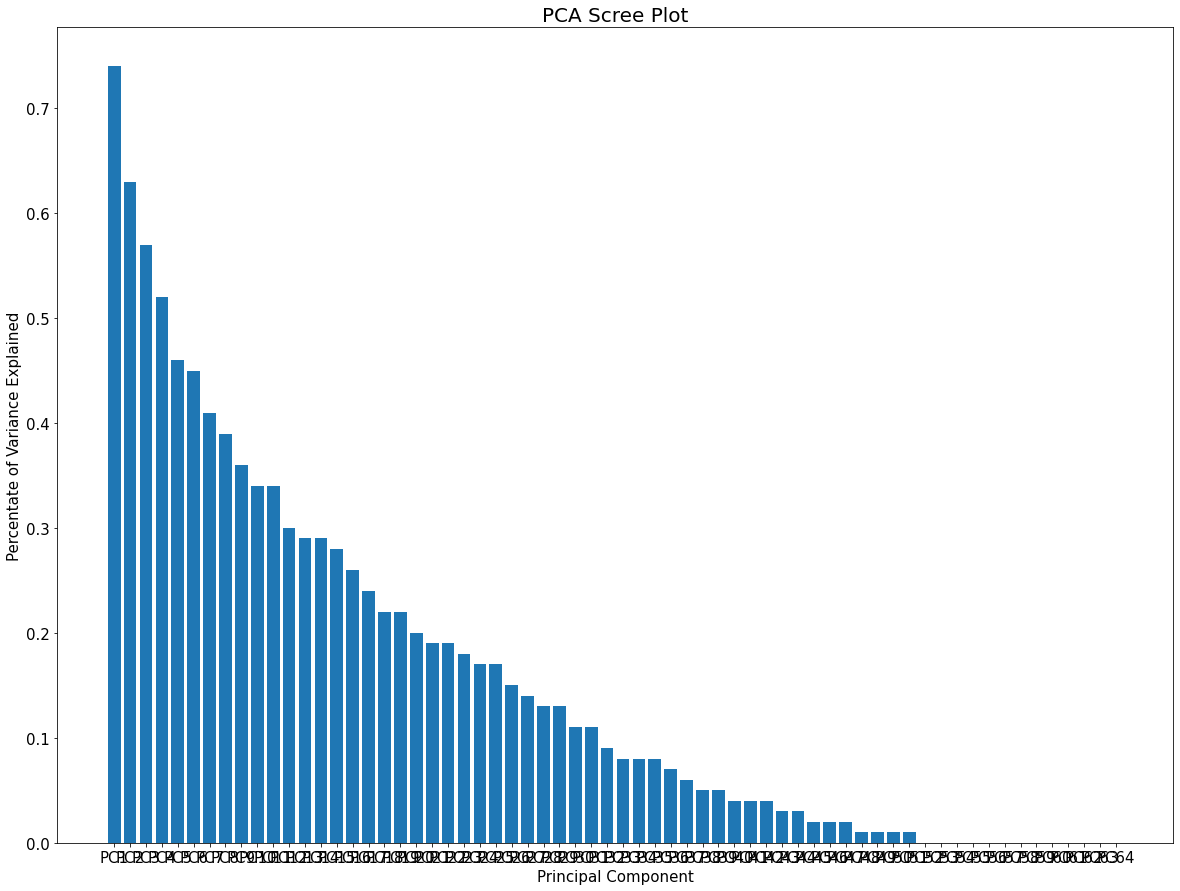

In [36]:
percent_variance = np.round(pca.explained_variance_ratio_ * 10, decimals = 2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i + 1}')
    
ax = plt.bar(x = range(len(percent_variance)), height = percent_variance, tick_label = columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

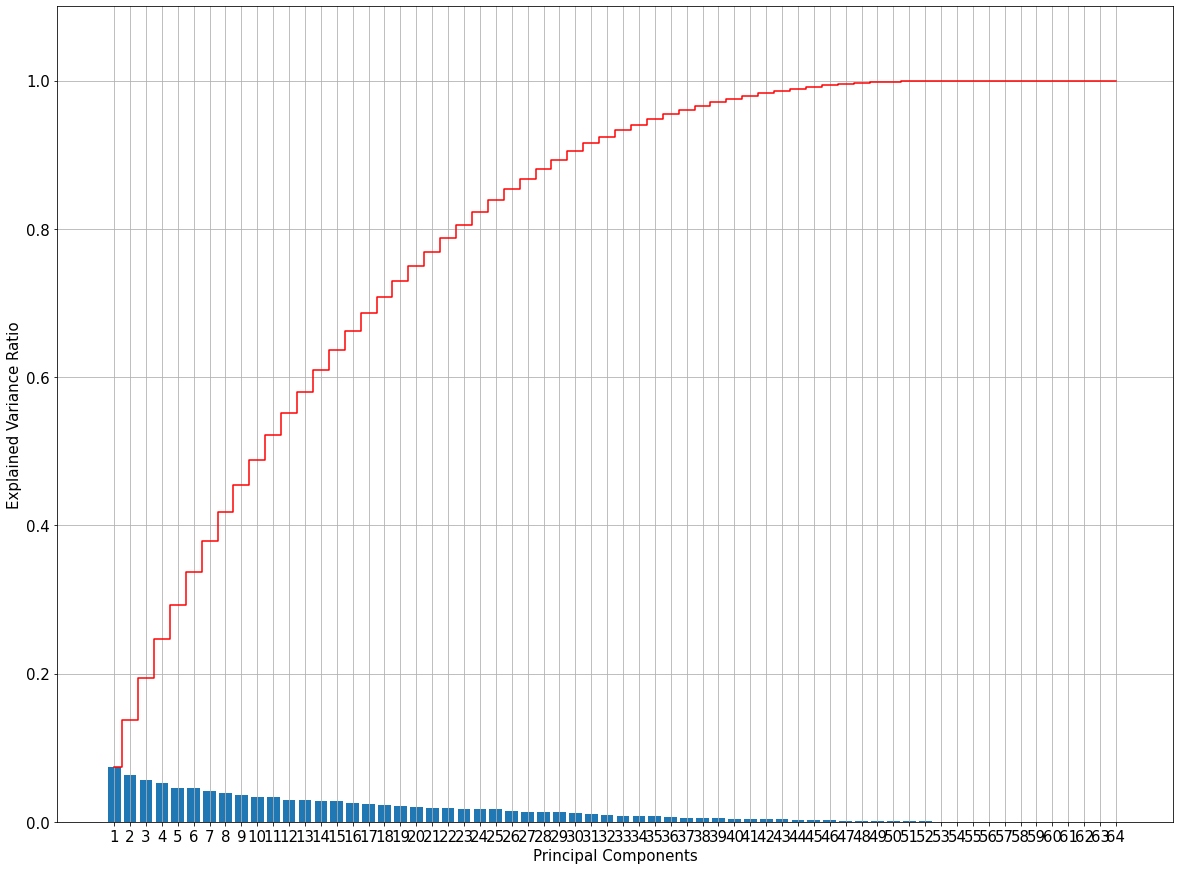

In [41]:
pca = PCA(n_components = X_cheese_sc.shape[1])
pca.fit(X_cheese_sc)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio) + 1)
    plt.bar(x_axis, explained_variance_ratio, align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio), where = 'mid', color = 'red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()
    
explained_variance_ratio_plot(explained_variance_ratio)

## PCA 모델링 1

In [46]:
X_cheese_sc_df = pd.DataFrame(X_cheese_sc)

pca = PCA(n_components = len(X_cheese_sc_df.columns) - 1)
pca_fit = pca.fit(cheese_model_data)

print('\n==================== PCA Result Summary ========================\n')
print('Singular value : \n', pca.singular_values_)
print('\n Singular vector : \n', pca.components_.T)
print('\n Explain Standard deviations : \n', np.sqrt(pca.explained_variance_))
print('\n Explain Variance Ratio : \n', pca.explained_variance_ratio_)
print('\n Noise Variance : \n', pca.noise_variance_)


==================== PCA Result Summary ========================

Singular value : 
 [2.65107605e+04 2.60550712e+02 1.01388016e+02 2.76825592e+01
 1.32851961e+01 8.60515326e+00 4.76484837e+00 4.00473182e+00
 3.90907477e+00 3.43029418e+00 3.29412997e+00 3.00184408e+00
 2.80021443e+00 2.60297670e+00 2.56530238e+00 2.32428365e+00
 2.29044731e+00 2.19965136e+00 2.09654539e+00 1.99458391e+00
 1.91549372e+00 1.80693936e+00 1.78399631e+00 1.67867994e+00
 1.65704614e+00 1.55342572e+00 1.47184499e+00 1.39581636e+00
 1.36884583e+00 1.27891489e+00 1.23127038e+00 1.15963840e+00
 1.11491460e+00 1.05301568e+00 1.01800899e+00 9.73428764e-01
 9.48847903e-01 9.17537162e-01 8.86755860e-01 8.52194790e-01
 8.13851111e-01 7.81850666e-01 7.68286365e-01 7.13446049e-01
 6.40027594e-01 5.97621027e-01 5.49957759e-01 5.46720012e-01
 4.79727687e-01 4.32521235e-01 3.94368298e-01 3.72609944e-01
 3.09661937e-01 2.83078581e-01 2.12387791e-01 1.20631357e-01
 6.19811221e-12 3.13471329e-12 2.30589319e-12 2.30589319e-12

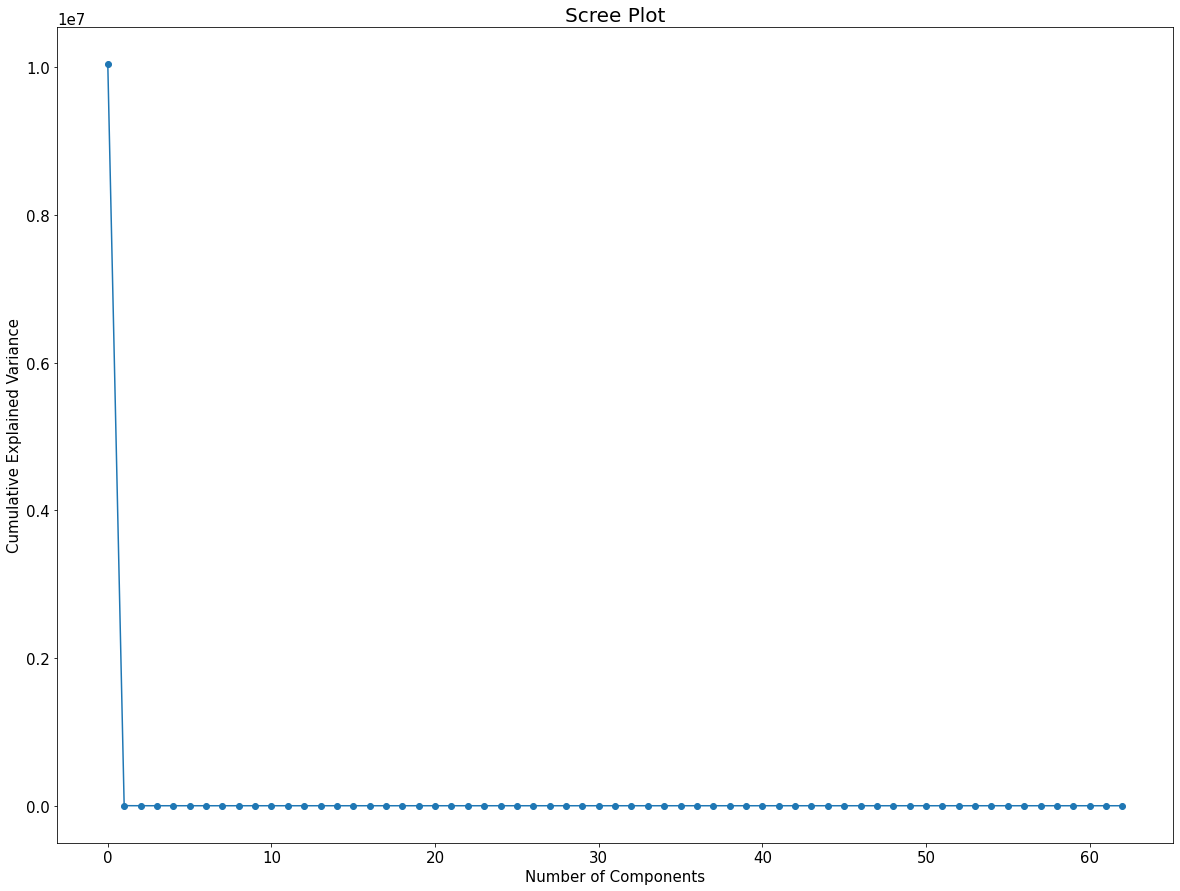

In [47]:
# Scree Plot
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')

### (1) PCA 모델링 - 1

In [21]:
from sklearn.decomposition import PCA

# PCA modeling
pca = PCA()
pca.fit(X_cheese_sc)

# data transform
X_pca_cheese = pca.transform(X_cheese_sc)

# look into data shape
print("original data: {}".format(str(X_cheese_sc.shape)))
print("transform data: {}".format(str(X_pca_cheese.shape)))

original data: (71, 64)
transform data: (71, 64)


In [22]:
pca.components_

array([[-2.67453150e-01,  0.00000000e+00, -9.74462695e-02, ...,
         2.92771971e-03, -2.48220662e-01,  3.66334231e-02],
       [-1.16228330e-01, -5.55111512e-17,  3.48543339e-02, ...,
        -1.68337936e-02,  3.17128216e-01,  9.33896204e-03],
       [-1.11772959e-01,  5.55111512e-17, -3.73848069e-02, ...,
         1.50458577e-02,  1.83221521e-01,  2.20925649e-02],
       ...,
       [-0.00000000e+00, -3.20510823e-01, -6.65241377e-17, ...,
        -1.11889664e-16,  2.02666504e-02, -7.63278329e-17],
       [ 0.00000000e+00, -6.86591731e-01, -3.34961145e-17, ...,
        -2.32452946e-16, -3.33998574e-02, -1.38777878e-17],
       [ 0.00000000e+00,  9.92197606e-03, -3.21014092e-17, ...,
        -7.81167665e-17, -1.23109353e-03, -3.92481186e-17]])

### (2) 산출한 특성별 주성분 요소 값과 특성들의 평가 스코어

In [ ]:
# PCA 1,2,3에 대한 변환 스코어
pc1 = 0
pc2 = 0
pc3 = 0

for j in range(len(pca.components_)):
    pc1 += pca.components_[0][j] * X_cheese_sc[:,j] # 계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것
    pc2 += pca.components_[1][j] * X_cheese_sc[:,j]
    pc3 += pca.components_[2][j] * X_cheese_sc[:,j]
    
pc1 = pc1.reshape(71, 1)
pc2 = pc2.reshape(71, 1)
pc3 = pc3.reshape(71, 1)

np.round(np.hstack((pc1, pc2, pc3)), 3) == np.round(X_pca_cheese, 3)

### (1) PCA 모델링 - 2

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
printcipalComponents = pca.fit_transform(X_cheese_train_sc)
# principalDf = pd.DataFrame(data = printcipalComponents, columns = ['principal component1', 'principal component2', 'principal component3', 'principal component4', 'principal component5'])
# principalDf.head()

print(X_cheese_train_sc.shape)
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio : ', pca.explained_variance_ratio_)

(49, 64)
singular value : [15.53061773 13.68157484 13.30965754 12.75327988 12.58554819]
singular vector :
 [[-3.27435484e-01 -8.22638528e-03  1.42891841e-01  5.74258411e-03
   6.98169843e-02]
 [ 2.22044605e-16 -8.32667268e-17  4.85722573e-17  2.77555756e-17
   6.59194921e-17]
 [-1.49067739e-01 -6.61744341e-02  2.05824074e-01 -4.36547927e-02
   4.49337643e-02]
 [ 8.59218441e-02 -8.98403693e-02  2.25336137e-01 -1.02572383e-01
  -1.49217759e-01]
 [-1.49585288e-01 -6.45561704e-02 -8.45401635e-02 -7.98205135e-02
   7.82568128e-02]
 [ 1.15104411e-02  2.22135029e-02 -5.66340343e-02  2.01473104e-02
  -3.71280608e-02]
 [-1.59195302e-01 -9.83637774e-02  4.70084875e-04  4.42413203e-01
   1.37571906e-01]
 [-1.21056817e-01 -5.98455857e-02  4.29672452e-02  2.50769771e-02
  -1.08216934e-01]
 [-1.32567013e-01  2.76428538e-02  2.56820902e-01 -1.33186939e-01
  -5.68504343e-02]
 [ 1.60009984e-02  5.47503372e-02 -1.01657031e-02 -5.10422324e-03
  -1.97205910e-02]
 [-1.59195302e-01 -9.83637774e-02  4.700848

### (2) Explained Variance Ratio와 적절한 차원 수 선택하기

In [ ]:
pc1 = v[:, 0]
proj1 = np.dot(X_cheese_sc, pc1)

pc2 = v[:, 1]
proj2 = np.dot(X_cheese_sc, pc2)

pc3 = v[:]

### 독립변수, 종속변수의 분포도를 확인하기

In [ ]:
# 독립변수가 어느 정도 정규분포를 따르는지, 종속 변수 값들이 적절한지 확인 필요
# 독립 변수가 min값과 max값 쪽에 몰려있는 식으로 이분화 되어 있다면 의미 없음

#### (1) 종속변수 (치즈 카테고리)

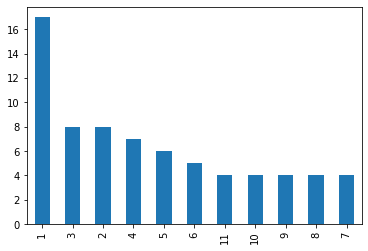

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df_X_cheese = pd.DataFrame(X_cheese)
df_y_cheese = pd.DataFrame(y_cheese)
df_y_cheese['category'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
import sklearn.decomposition import PCA


## K-Means 클러스터링

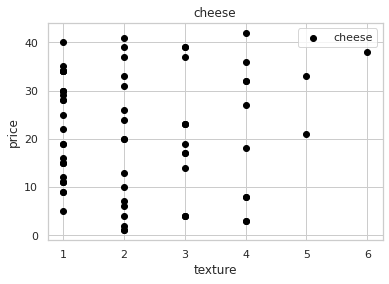

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

# sns.set(style = 'whitegrid')
# X = X_cheese.iloc[:,[0, 4]].values
# m = X.shape[0]
# n = X.shape[1]

# plt.scatter(X[:,0], X[:,1], c = 'black', label = 'cheese')
# plt.xlabel('texture')
# plt.ylabel('brand')
# plt.legend()
# plt.title('cheese')
# plt.show()

sns.set(style = 'whitegrid')
X = X_cheese.iloc[:,[0, 3]].values
m = X.shape[0]
n = X.shape[1]

plt.scatter(X[:,0], X[:,1], c = 'black', label = 'cheese')
plt.xlabel('texture')
plt.ylabel('price')
plt.legend()
plt.title('cheese')
plt.show()

In [40]:
import numpy as np

k = 3
n_iter = 100
Centroids = np.array([]).reshape(n, 0)
Centroids

array([], shape=(2, 0), dtype=float64)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt


## KNN 모델링

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier()
clf.fit(X_cheese_train, y_cheese_train)
prediction = clf.predict(X_cheese_test)
print("clf.score              : {0:.3f}".format(clf.score(X_cheese_train, y_cheese_train)))
print("(pred == y_test) score : {0:.3f}".format((prediction == y_cheese_test).mean()))
print("cross_val_score        : {0:.3f}".format(cross_val_score(clf, X_cheese_train, y_cheese_train, cv = 10)))

clf.score              : 0.347
(pred == y_test) score : 0.182


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


TypeError: unsupported format string passed to numpy.ndarray.__format__

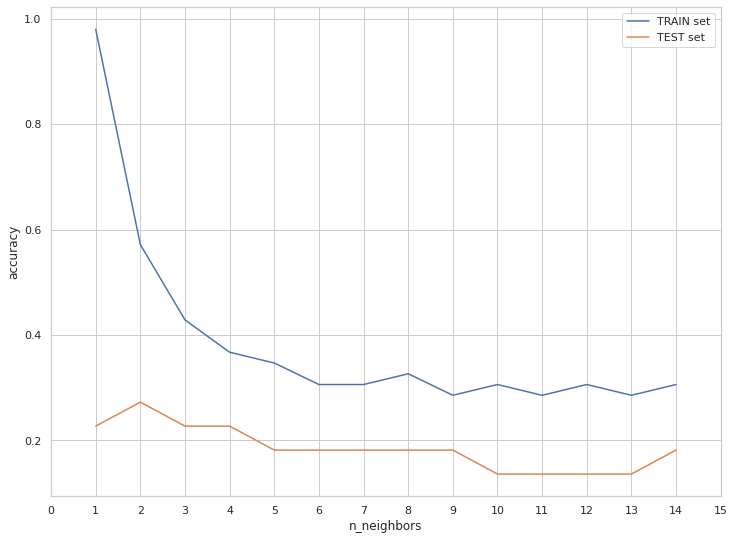

In [43]:
train_acc = []
test_acc = []

for n in range(1, 15):
    clf = KNeighborsClassifier(n_jobs = -1, n_neighbors = n)
    clf.fit(X_cheese_train, y_cheese_train)
    prediction = clf.predict(X_cheese_test)
    train_acc.append(clf.score(X_cheese_train, y_cheese_train))
    test_acc.append((prediction == y_cheese_test).mean())
    
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label = 'TRAIN set')
plt.plot(range(1, 15), test_acc, label = 'TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step = 1))
plt.legend()

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_cheese_train, y_cheese_train)
prediction = clf.predict(X_cheese_test)
print("clf.score              : {0:.3f}".format(clf.score(X_cheese_train, y_cheese_train)))
print("(pred == y_test) score : {0:.3f}".format((prediction == y_cheese_test).mean()))
print("cross_val_score        : {0:.3f}".format(cross_val_score(clf, X_cheese_train, y_cheese_train, cv = 10)))

clf.score              : 0.571
(pred == y_test) score : 0.273


/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


TypeError: unsupported format string passed to numpy.ndarray.__format__

### KNN 시도 1 - (1) 모델링

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_cheese_train, y_cheese_train)

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### KNN 시도 1 - (2) 예측하기

In [24]:
X_new = np.array([[1,1,14900,11,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 64)


In [25]:
prediction = knn.predict(X_new)
print("예측: {}". format(prediction))
print("예측한 타깃의 이름: {}".format(y_cheese_train['category'][prediction]))

예측: [11]
예측한 타깃의 이름: 11    8
Name: category, dtype: int64


In [26]:
X_new_1 = np.array([[1,1,3990,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("X_new_1.shape: {}".format(X_new_1.shape))

X_new_1.shape: (1, 64)


In [27]:
prediction = knn.predict(X_new)
print("예측: {}". format(prediction))
print("예측한 타깃의 이름: {}".format(y_cheese_train['category'][prediction]))

예측: [11]
예측한 타깃의 이름: 11    8
Name: category, dtype: int64


### KNN 시도 1 - (3) 모델 평가하기

In [28]:
y_pred = knn.predict(X_cheese_test)
print("테스트 세트에 대한 예측값: \n {}".format(y_pred))

테스트 세트에 대한 예측값: 
 [ 5  7 11  1  7  4  8  4  1 11  6  9  8  1  7  7  5  2  1  1  9  1]


In [40]:
y_cheese_test_t = np.array(y_cheese_test).T

In [41]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_cheese_test_t)))

테스트 세트의 정확도 : 0.23


In [37]:
print(y_cheese_test.shape)

(22, 1)


### KNN 시도 2 - (1) 모델 생성

In [42]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2, metric="cosine")

knn.fit(X_cheese_train, y_cheese_train)

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(metric='cosine', n_neighbors=2)

### KNN 시도 2 - (2) 예측하기

In [43]:
X_new = np.array([[1,1,14900,11,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 64)


In [44]:
prediction = knn.predict(X_new)
print("예측: {}". format(prediction))
print("예측한 타깃의 이름: {}".format(y_cheese_train['category'][prediction]))

예측: [2]
예측한 타깃의 이름: 2    1
Name: category, dtype: int64


In [45]:
X_new_1 = np.array([[1,1,3990,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("X_new_1.shape: {}".format(X_new_1.shape))

X_new_1.shape: (1, 64)


In [46]:
prediction = knn.predict(X_new)
print("예측: {}". format(prediction))
print("예측한 타깃의 이름: {}".format(y_cheese_train['category'][prediction]))

예측: [2]
예측한 타깃의 이름: 2    1
Name: category, dtype: int64


### KNN 시도 3 - (3) 모델 평가하기

In [47]:
y_pred = knn.predict(X_cheese_test)
print("테스트 세트에 대한 예측값: \n {}".format(y_pred))

테스트 세트에 대한 예측값: 
 [2 1 2 1 7 2 3 5 2 6 2 2 3 9 2 2 4 2 1 3 2 1]


In [48]:
y_cheese_test_t = np.array(y_cheese_test).T

In [49]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_cheese_test_t)))

테스트 세트의 정확도 : 0.32


## 아이템 기반 협업 필터링 (KNN)

In [54]:
from sklearn.neighbors import NearestNeighbors

k = X_cheese_train.shape[1]
neigh = NearestNeighbors(n_neighbors = k, metric = "cosine")
neigh.fit(X_cheese_train.T)

NearestNeighbors(metric='cosine', n_neighbors=64)

In [55]:
item_distances, _ = neigh.kneighbors(X_cheese_train.T, return_distance = True)

# 11/18 치즈 모델링 (텐서플로우 활용)

## (1) 데이터셋 설정

In [38]:
import pandas as pd

cheese = pd.read_csv("resources/data/cheese_dataset.csv")
cheese_matching = pd.read_csv("resources/data/cheese_matching.csv", encoding="utf-8")

cheese_df = cheese.rename(columns = {"Unnamed: 0": "cheese_no"})
cheese_matching_df = cheese_matching.rename(columns={"Unnamed: 0": "cheese_no"})

cheese_data = pd.merge(cheese_df, cheese_matching_df, on="cheese_no", how = "inner")

cheese_model_data = cheese_data.drop(['Unnamed: 0.1', 'content', 'img', 'brand', 'name', 'country', 'matching'], axis = 1)
cheese_2 = cheese_data.drop(['Unnamed: 0.1', 'content', 'img', 'matching'], axis = 1)

from sklearn.model_selection import train_test_split

# X = users.loc[['texture', 'types', 'category', 'brand_code', ]]
X_cheese = cheese_model_data.iloc[:, 9:68]
# X_cheese = X_cheese.drop(['cheese_id'], axis = 1)
y_cheese = cheese_model_data[['cheese_id']]

X_cheese_train, X_cheese_test, y_cheese_train, y_cheese_test = train_test_split(X_cheese, y_cheese, test_size = 0.3)

In [39]:
X_cheese_train.head(5)

,간식,감자,견과류,과일,그라탕,김가루,꿀,딥소스,라자냐,리소토,...,테이블치즈,토마토,토스트,파스타,팬케이크,퐁듀,피자,핑거 푸드,핑거푸드,화이트와인
36,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_cheese_train.shape

(49, 59)

In [41]:
X_cheese_test.shape

(22, 59)

In [42]:
y_cheese

,cheese_id
0,1
1,2
2,3
3,4
4,5
...,...
66,67
67,68
68,69
69,70


In [6]:
y_cheese_train.shape

(49, 1)

In [23]:
y_cheese_train_arr = y_cheese_train.to_numpy()
print(y_cheese_train_arr)
print(y_cheese_train_arr.shape)

[[20]
 [57]
 [11]
 [68]
 [22]
 [47]
 [69]
 [ 7]
 [50]
 [ 8]
 [ 3]
 [61]
 [67]
 [58]
 [70]
 [38]
 [34]
 [17]
 [15]
 [16]
 [33]
 [44]
 [13]
 [ 1]
 [49]
 [26]
 [23]
 [35]
 [63]
 [56]
 [52]
 [41]
 [46]
 [25]
 [45]
 [36]
 [43]
 [59]
 [ 9]
 [21]
 [10]
 [71]
 [19]
 [28]
 [18]
 [30]
 [39]
 [14]
 [64]]
(49, 1)


## (2) 모델링 설정

In [43]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2, metric="cosine")
knn.fit(X_cheese_train, y_cheese_train)

/home/bitai/anaconda3/envs/cheese-ai/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(metric='cosine', n_neighbors=2)

In [44]:
X_new = np.array([[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 59)


In [45]:
prediction = knn.predict(X_new)
print("예측: {}". format(prediction))
print("예측한 타깃의 이름: {}".format(y_cheese_train_arr[prediction]))

예측: [1]
예측한 타깃의 이름: [[57]]


In [46]:
y_pred = knn.predict(X_cheese_test)
print("테스트 세트에 대한 예측값: \n {}".format(y_pred))

y_cheese_test_t = np.array(y_cheese_test).T

print("clf.score        : {0:.3f}".format(knn.score(X_cheese_train, y_cheese_train)))
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_cheese_test_t)))

테스트 세트에 대한 예측값: 
 [60 38 54 33 59  7 43 36 40 29 29 22 16 37 15 37  8 16 19 44  8 26]
clf.score        : 0.592
테스트 세트의 정확도 : 0.00


## (3) 모델링 저장

In [47]:
import joblib
joblib.dump(knn, "cheese_knn_model.pkl")

['cheese_knn_model.pkl']

### test 데이터

In [50]:
loaded_model = joblib.load("cheese_knn_model.pkl")

score = loaded_model.score(X_cheese_test, y_cheese_test)
pred_y = loaded_model.predict(X_cheese_test)

In [51]:
print('정확도: {score: .3f}'.format(score=score))

정확도:  0.000


In [53]:
# print('예측값: {}'.format(pred_y = pred_y))
loaded_model.predict(X_cheese_test)

array([60, 38, 54, 33, 59,  7, 43, 36, 40, 29, 29, 22, 16, 37, 15, 37,  8,
       16, 19, 44,  8, 26])

### train 데이터

In [54]:
loaded_model = joblib.load("cheese_knn_model.pkl")

score = loaded_model.score(X_cheese_train, y_cheese_train)
pred_y = loaded_model.predict(X_cheese_train)

In [55]:
print('정확도: {score: .3f}'.format(score=score))

정확도:  0.592


In [56]:
# print('예측값: {}'.format(pred_y = pred_y))
loaded_model.predict(X_cheese_train)

array([15, 29, 29,  8,  8,  8, 61, 26,  8, 11,  1,  6, 59, 64, 15,  2, 40,
       16, 47, 19, 36, 44, 44, 54, 26,  7, 11, 14, 15, 61, 60, 16, 36, 59,
       33, 34, 14,  4,  3, 14, 37, 23, 18, 54, 39, 47, 42, 12, 38])

## 텐서플로우 KNN 시도 1

In [77]:
import tensorflow as tf
tf.executing_eagerly()

# X_cheese_train = tf.compat.v1.placeholder(tf.float32, shape=(49, 59))
# X_cheese_test = tf.compat.v1.placeholder(tf.float32, shape=(22,59))

X_cheese_train = tf.compat.v1.placeholder(tf.float32, shape=(None, 59))
X_cheese_test = tf.compat.v1.placeholder(tf.float32, shape=(59))

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.compat.v1.reduce_sum(tf.math.abs(tf.math.add(X_cheese_train, tf.negative(X_cheese_test))), reduction_indices = 1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.compat.v1.arg_min(distance, 0)

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.compat.v1.global_variables_initializer()


#Start training
with tf.compat.v1.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    # loop over test data
    for i in range(len(X_cheese_test)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={X_cheese_train: X_cheese_train, X_cheese_test: X_cheese_test[i, : ]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(y_cheese_test[i]),\
                 "Ture Class:", np.argmax(y_cheese_test[i]))
        
        # Calculate accuracy
        if np.argmax(y_cheese_train[nn_index]) == np.argmax(y_cheese_test[i]):
            accuracy += 1. / len(X_cheese_test)
    print("Accuracy : ", accuracy)


TypeError: len is not well defined for symbolic Tensors. (Placeholder_43:0) Please call `x.shape` rather than `len(x)` for shape information.

In [73]:
import tensorflow as tf

#Start training
with tf.compat.v1.Session() as sess:
    
    X_cheese_train = tf.compat.v1.placeholder("float", [None,59])
    X_cheese_test = tf.compat.v1.placeholder("float", [59])

    # Nearest Neighbor calculation using L1 Distance
    # Calculate L1 Distance
    distance = tf.compat.v1.reduce_sum(tf.abs(tf.add(X_cheese_train, tf.negative(X_cheese_test))), reduction_indices = 1)
    # Prediction: Get min distance index (Nearest neighbor)
    pred = tf.compat.v1.arg_min(distance, 0)

    accuracy = 0.

    # Initialize the variables (i.e. assign their default value)
    init = tf.compat.v1.global_variables_initializer()

    # Run the initializer
    sess.run(init)
    
    # loop over test data
    for i in range(X_cheese_test.shape):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={X_cheese_train: X_cheese_train, X_cheese_test: X_cheese_test[i, : ]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(y_cheese_test[i]),\
                 "Ture Class:", np.argmax(y_cheese_test[i]))
        
        # Calculate accuracy
        if np.argmax(y_cheese_train[nn_index]) == np.argmax(y_cheese_test[i]):
            accuracy += 1. / len(X_cheese_test)
    print("Accuracy : ", accuracy)


TypeError: 'TensorShape' object cannot be interpreted as an integer

## 텐서플로우 KNN 시도 2

In [14]:
X_cheese_train_arr = X_cheese_train.to_numpy()
X_cheese_test_arr = X_cheese_test.to_numpy()
y_cheese_train = y_cheese_train.to_numpy()
y_cheese_test = y_cheese_test.to_numpy()

cheese_model_data_arr = cheese_model_data.to_numpy()

In [15]:
import tensorflow as tf

X_cheese_train_arr, y_cheese_train_arr = cheese_model_data_arr.train.next_batch(100)
X_chees_test_arr, y_cheese_test_arr = cheese_model_data_arr.test.next_batch(10)

# 비용 함수와 거리 최적화를 정의한다.
cheese_train_Tensor = tf.placeholder("float", [49, 59])
cheese_test_Tensor = tf.placeholder("float", [22, 59])

distance = tf.reduce_sum(tf.abs(tf.add(cheese_train_Tensor, tf.negative(cheese_test_Tensor))), reduction_indices = 1)

predictor = tf.argmin(distance, 0)

# 테스트
accuracy = 0.

initializer = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(initializer)
    for i in range(len(y_cheese_test)):
        predictNumberIndex = sess.run(predictor, feed_dict = { cheese_train_Tensor : X_cheese_train, cheese_test_Tensor : X_cheese_test[i, :]})
        print("회차 : {0}, 예측 숫자 : {1}, 실제 숫자 : {2}".format(i, np.argmax(y_cheese_train[predictNumberIndex]), np.argmax(y_cheese_test[i])))
        if np.argmax(y_cheese_trin[predictNumberIndex]) == np.argmax(y_cheese_test[i]):
            accuracy += 1. / len(X_cheese_test)
        print("정확도 = {0}".format(accuracy))

AttributeError: 'numpy.ndarray' object has no attribute 'train'

In [ ]:
import tensorflow as tf
import pandas
import numpy as np

# init
x_values = []
y_values = []
vector_values = []

for i in range(num_vectors):
    if np.random.random() > 0.5:
        x_values.append(np.random.normal(0.4, 0.7))
        y_values.append(np.random.normal(0.2, 0.8))
        
    else:
        x_values.